<a href="https://colab.research.google.com/github/mickeykim70/DL_scratch/blob/main/RGB_seperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# 프로젝트 기본 경로 설정
BASE_DIR = Path("/content/drive/MyDrive/deep-learning-from-scratch-master")
sys.path.append(str(BASE_DIR))

# 데이터셋 경로 설정
DATASET_DIR = BASE_DIR / 'dataset'

# 필요한 경우 경로가 존재하는지 확인
if not DATASET_DIR.exists():
    raise FileNotFoundError(f"Dataset directory not found at {DATASET_DIR}")


In [27]:
from ch07.simple_convnet import SimpleConvNet
from common.layers import Pooling

In [28]:
# 이미지 로드
img = imread(str(DATASET_DIR / 'lena.png'))

In [5]:
print(img.shape)

(256, 256, 3)


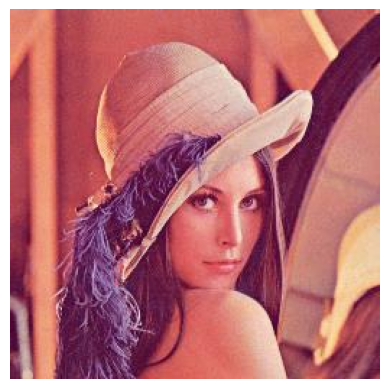

In [6]:
plt.imshow(img)
plt.axis('off')
plt.show()

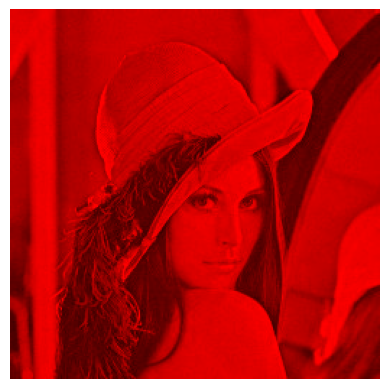

In [7]:
red = img.copy()
red[:,:,1] = 0
red[:,:,2] = 0
plt.imshow(red)
plt.axis('off')
plt.show()

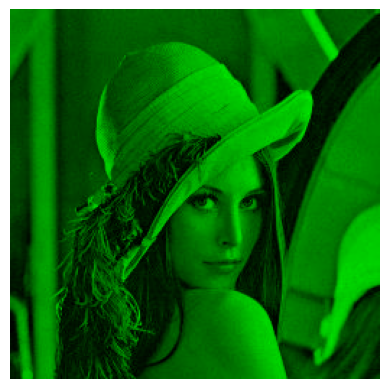

In [8]:
green = img.copy()
green[:,:,0] = 0
green[:,:,2] = 0
plt.imshow(green)
plt.axis('off')
plt.show()

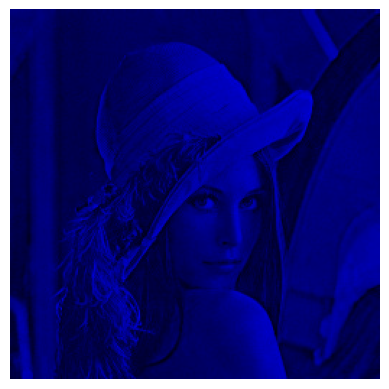

In [9]:
blue = img.copy()
blue[:,:,0] = 0
blue[:,:,1] = 0
plt.imshow(blue)
plt.axis('off')
plt.show()

In [15]:
img_gray = imread(str(BASE_DIR / 'dataset/lena_gray.png'))

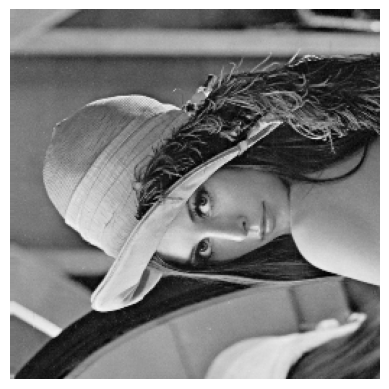

In [20]:
img_gray = img_gray.T
plt.imshow(img_gray, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

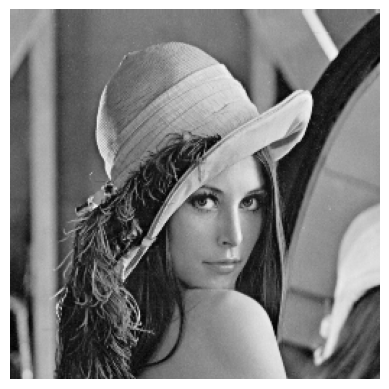

In [33]:
from common.layers import Convolution

img_gray = imread(str(BASE_DIR / 'dataset/lena_gray.png'))
plt.imshow(img_gray, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

img = img_gray.reshape(1,1,*img_gray.shape)

수평 sobel 필터
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


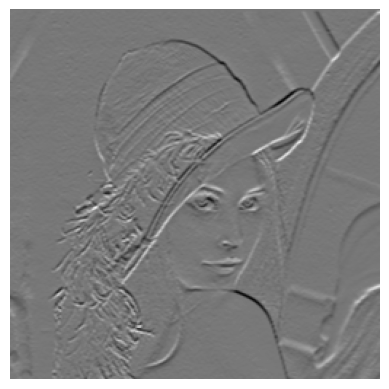

In [36]:
w_y = np.array([[[[1,2,1],[0,0,0],[-1,-2,-1]]]])
b=0

print(f'수평 sobel 필터')
print(w_y[0][0])

conv_layer = Convolution(w_y, b)
out = conv_layer.forward(img)
out = out.reshape(out.shape[2], out.shape[3])
plt.imshow(out, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

수직 sobel 필터
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


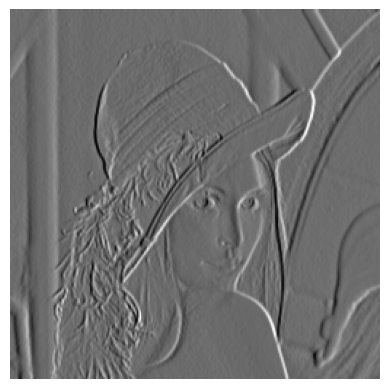

In [37]:
w_y = np.array([[[[1,0,-1],[2,0,-2],[1,0,-1]]]])
b=0

print(f'수직 sobel 필터')
print(w_y[0][0])

conv_layer = Convolution(w_y, b)
out = conv_layer.forward(img)
out = out.reshape(out.shape[2], out.shape[3])
plt.imshow(out, cmap=plt.cm.gray)
plt.axis('off')
plt.show()